In [0]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=adf034963f88bf00d84aa154813b345a29c7a2f72a92142dd0847377916919c9
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  | Proc size: 282.1 MB
GPU RAM Free: 16270MB | Used: 10MB | Util   0% | Total 16280MB


In [0]:
!unzip drive/My\ Drive/Colab\ Notebooks/DeepPavlov_ru-SBERT.zip 

Archive:  drive/My Drive/Colab Notebooks/DeepPavlov_ru-SBERT.zip
   creating: DeepPavlov_ru-SBERT/
   creating: DeepPavlov_ru-SBERT/data/
  inflating: DeepPavlov_ru-SBERT/data/label_weights.pkl  
  inflating: DeepPavlov_ru-SBERT/data/train.parquet  
  inflating: DeepPavlov_ru-SBERT/data/test.parquet  
  inflating: DeepPavlov_ru-SBERT/data/val.parquet  
   creating: DeepPavlov_ru-SBERT/source/
  inflating: DeepPavlov_ru-SBERT/source/model.py  
  inflating: DeepPavlov_ru-SBERT/source/eval.py  
  inflating: DeepPavlov_ru-SBERT/source/config.py  
  inflating: DeepPavlov_ru-SBERT/source/train.py  
  inflating: DeepPavlov_ru-SBERT/run_colab_training.py  
 extracting: DeepPavlov_ru-SBERT/requirements.in  
  inflating: DeepPavlov_ru-SBERT/requirements.txt  


In [0]:
!pip install -r DeepPavlov_ru-SBERT/requirements.txt

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 6.2MB 8.3MB/s 
     |████████████████████████████████| 829kB 47.9MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 460kB 57.3MB/s 
     |████████████████████████████████| 92kB 12.7MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 20.2MB 103kB/s 
     |████████████████████████████████| 1.3MB 48.6MB/s 
     |████████████████████████████████| 450kB 51.0MB/s 
     |████████████████████████████████| 256kB 51.1MB/s 
     |████████████████████████████████| 276kB 49.9MB/s 
     |████████████████████████████████| 686kB 35.7MB/s 
     |████████████████████████████████| 890kB 59.0MB/s 
     |████████████████████████████████| 1.1MB 51.3MB/s 
     |████████████████████████████████| 112kB 59.6MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 3.0MB 47.3MB/s

In [0]:
#!python DeepPavlov_ru-SBERT/run_colab_training.py

In [0]:
!cp -r DeepPavlov_ru-SBERT/source .
!cp -r DeepPavlov_ru-SBERT/data .

In [0]:
import gc
import torch

def memory_cleanup():
    """
    Cleans up GPU memory 
    https://github.com/huggingface/transformers/issues/1742
    """
    for obj in gc.get_objects():
        if torch.is_tensor(obj):
            del obj
    gc.collect()
    torch.cuda.empty_cache()

memory_cleanup()

/usr/local/lib/python3.6/dist-packages/torch/distributed/distributed_c10d.py:102: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


In [0]:
import pickle
import os
from source import config, train, eval
from source.model import ModelClass, DatasetClass

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
RUN_NAME = 'DeepPavlov_ru-SBERT'
with open('data/label_weights.pkl', 'rb') as f:
        class_weights = pickle.load(f)
config = config.get_config('DeepPavlov_ru-SBERT/', num_classes=len(class_weights), weigths=list(class_weights.values()), batch_size=12)
model = train.run_training(ModelClass, config, run_name=RUN_NAME)

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]


Tokenizing...:   0%|          | 0/215054 [00:00<?, ?it/s]

Tokenizing...: 100%|██████████| 71685/71685 [01:10<00:00, 1021.50it/s]


wandb: Wandb version 0.9.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade

    | Name                                             | Type              | Params
-----------------------------------------------------------------------------------
0   | bert                                             | BertModel         | 177 M 
1   | bert.embeddings                                  | BertEmbeddings    | 92 M  
2   | bert.embeddings.word_embeddings                  | Embedding         | 91 M  
3   | bert.embeddings.position_embeddings              | Embedding         | 393 K 
4   | bert.embeddings.token_type_embeddings            | Embedding         | 1 K   
5   | bert.embeddings.LayerNorm                        | LayerNorm         | 1 K   
6   | bert.embeddings.dropout                          | Dropout           | 0     
7   | bert.encoder                                     | BertEncoder       | 85 M  
8   | bert.encoder.layer                               

/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)
wandb: WARNING Adding to old History rows isn't currently supported.  Step 0 < 2; dropping {'train_loss': 4.245400428771973, 'epoch': 0}.


wandb: WARNING Adding to old History rows isn't currently supported.  Step 17921 < 23894; dropping {'val_epoch_loss': 0.6231042742729187, 'val_epoch_auc': 0.9873873498300311, 'epoch': 0}.

Epoch 00000: val_epoch_auc reached 0.98739 (best 0.98739), saving model to drive/My Drive/Colab Notebooks/checkpoints/DeepPavlov_ru-SBERT_epoch=0-val_epoch_auc=0.99.ckpt as top 1
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
wandb: WARNING Adding to old History rows isn't currently supported.  Step 17922 < 23894; dropping {'train_epoch_loss': 1.4838446378707886, 'epoch': 0}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 17922 < 23894; dropping {'train_loss': 0.9266144037246704, 'epoch': 1}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 17932 < 23894; dropping {'train_lo

wandb: WARNING Adding to old History rows isn't currently supported.  Step 35843 < 41816; dropping {'val_epoch_loss': 0.4251424968242645, 'val_epoch_auc': 0.9910331201465145, 'epoch': 1}.

Epoch 00001: val_epoch_auc reached 0.99103 (best 0.99103), saving model to drive/My Drive/Colab Notebooks/checkpoints/DeepPavlov_ru-SBERT_epoch=1-val_epoch_auc=0.99.ckpt as top 1
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
wandb: WARNING Adding to old History rows isn't currently supported.  Step 35844 < 41816; dropping {'train_epoch_loss': 0.42969146370887756, 'epoch': 1}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 35844 < 41816; dropping {'train_loss': 0.03629476949572563, 'epoch': 2}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 35854 < 41816; dropping {'train_

wandb: WARNING Adding to old History rows isn't currently supported.  Step 53765 < 59738; dropping {'val_epoch_loss': 0.2817366421222687, 'val_epoch_auc': 0.9948564190644321, 'epoch': 2}.

Epoch 00002: val_epoch_auc reached 0.99486 (best 0.99486), saving model to drive/My Drive/Colab Notebooks/checkpoints/DeepPavlov_ru-SBERT_epoch=2-val_epoch_auc=0.99.ckpt as top 1
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
wandb: WARNING Adding to old History rows isn't currently supported.  Step 53766 < 59738; dropping {'train_epoch_loss': 0.2515919804573059, 'epoch': 2}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 53766 < 59738; dropping {'train_loss': 0.016358355060219765, 'epoch': 3}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 53776 < 59738; dropping {'train_

wandb: WARNING Adding to old History rows isn't currently supported.  Step 71687 < 77660; dropping {'val_epoch_loss': 0.2502492666244507, 'val_epoch_auc': 0.9933857892547169, 'epoch': 3}.

Epoch 00003: val_epoch_auc  was not in top 1
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71688 < 77660; dropping {'train_epoch_loss': 0.1764739602804184, 'epoch': 3}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71688 < 77660; dropping {'train_loss': 0.015067234635353088, 'epoch': 4}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71698 < 77660; dropping {'train_loss': 0.018068820238113403, 'epoch': 4}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71708 < 77660; dropping {'train_loss': 0.002450789324939251, 'epoch': 4}.
wandb: WARNING Adding to old History rows isn't currently supported.  Step 71718 < 77660; dropping {'train_loss': 0.12131666392087936, 'epoch': 4}.
wandb: WARNING Add

wandb: WARNING Adding to old History rows isn't currently supported.  Step 89609 < 95582; dropping {'val_epoch_loss': 0.29187747836112976, 'val_epoch_auc': 0.9937901011866044, 'epoch': 4}.

Epoch 00004: val_epoch_auc  was not in top 1
wandb: WARNING Adding to old History rows isn't currently supported.  Step 89610 < 95582; dropping {'train_epoch_loss': 0.1381446123123169, 'epoch': 4}.


FileNotFoundError: ignored

In [0]:
for file in os.listdir('drive/My Drive/Colab Notebooks/checkpoints'):
  if file.endswith(".ckpt"):
    ckpt_path = os.path.join('drive/My Drive/Colab Notebooks/checkpoints', file)

model = ModelClass.load_from_checkpoint(ckpt_path)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from sklearn.metrics import roc_auc_score, confusion_matrix

def evaluate(model, workdir, run_name):
    test = pd.read_parquet(os.path.join(workdir, 'data/test.parquet'))
    annos = test.columns[1:]
    features, labels = test['question'].to_numpy(), test.drop('question', axis=1).to_numpy()
    del test

    preds_probas = model.predict(features).cpu().numpy()
    labels_max = np.argmax(labels, axis=1)
    preds = np.argmax(preds_probas, axis=1)
    #compute cm
    cm = confusion_matrix(labels_max, preds, normalize='true')
    #sort it
    sorting_idx = np.argsort(np.diag(cm))[::-1]
    sorted_cm = cm[sorting_idx,:][:,sorting_idx]
    sorted_annos = []
    for id in sorting_idx:
        sorted_annos.append(annos[id])
    #plot heatmap
    fig, ax = plt.subplots(figsize=(20,20))
    ax = sns.heatmap(sorted_cm, vmax=1, xticklabels=sorted_annos, yticklabels=sorted_annos)
    fig.savefig(f"drive/My Drive/Colab Notebooks/{run_name}_heatmap.svg")
    #print metric
    auc = roc_auc_score(labels, preds_probas, average='macro', multi_class='ovo')
    print(f'Macro ROC-AUC = {auc}')

Predicting on cuda: 100%|██████████| 2241/2241 [20:03<00:00,  1.86it/s]


Macro ROC-AUC = 0.9951781542777379


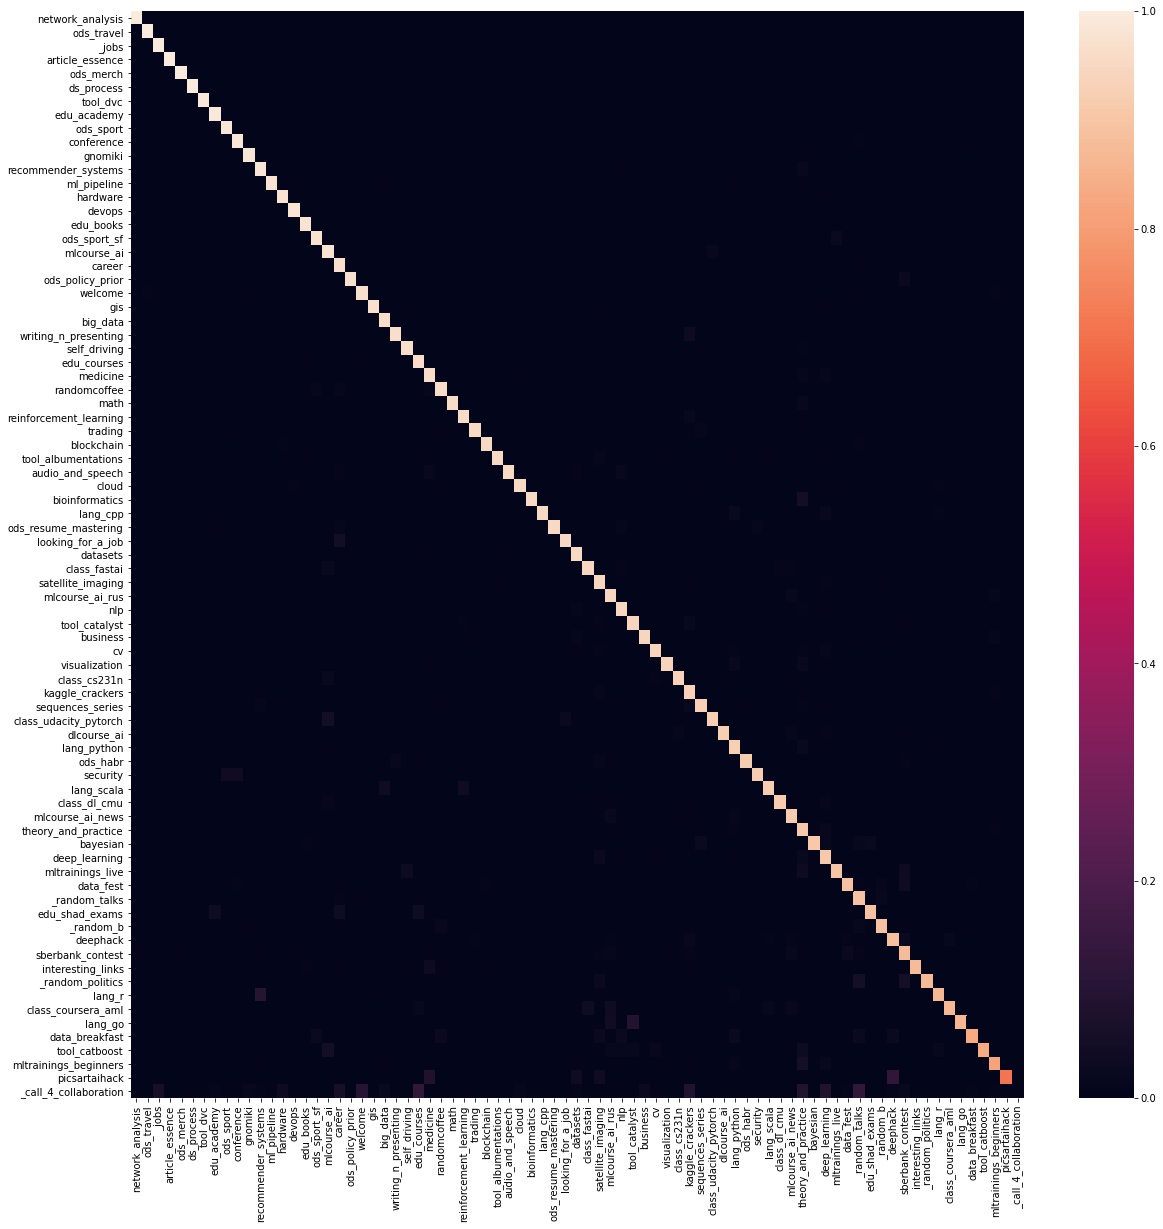

In [0]:
RUN_NAME = 'DeepPavlov_ru-SBERT'
evaluate(model, 'DeepPavlov_ru-SBERT', RUN_NAME)